In [142]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [143]:
sp500 = yf.Ticker('^GSPC')
sp500 = sp500.history(period='max')
del sp500['Dividends']
del sp500['Stock Splits']
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000


<Axes: xlabel='Date'>

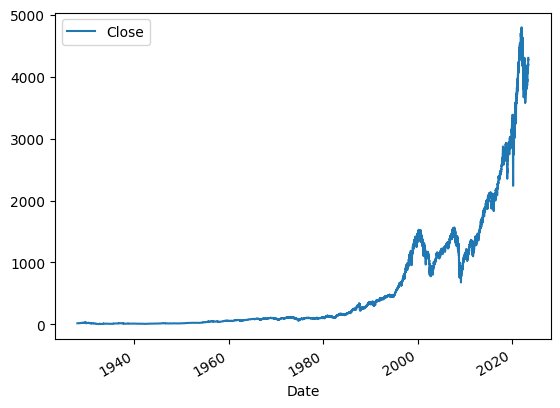

In [144]:
sp500.plot.line(y='Close', use_index = True)

In [145]:
sp500['Tomorrow'] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,4283.850098
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176


In [146]:
sp500['Target'] = (sp500['Tomorrow'] > sp500["Close"]).astype(int)
sp500 = sp500.loc['1990-01-01':].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,4283.850098,1
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1


In [147]:
model = RandomForestClassifier(n_estimators=500,min_samples_split=100,random_state=1) 

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [148]:
from sklearn.metrics import precision_score

preds = model.predict((test[predictors]))

preds = pd.Series(preds, index=test.index)
preds

Date
2023-01-18 00:00:00-05:00    0
2023-01-19 00:00:00-05:00    0
2023-01-20 00:00:00-05:00    0
2023-01-23 00:00:00-05:00    0
2023-01-24 00:00:00-05:00    0
                            ..
2023-06-05 00:00:00-04:00    1
2023-06-06 00:00:00-04:00    1
2023-06-07 00:00:00-04:00    1
2023-06-08 00:00:00-04:00    1
2023-06-09 00:00:00-04:00    0
Length: 100, dtype: int32

In [149]:
precision_score(test['Target'], preds)

0.6428571428571429

<Axes: xlabel='Date'>

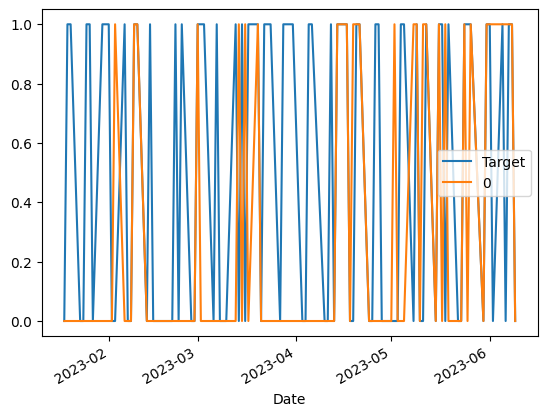

In [150]:
combined = pd.concat([test['Target'], preds], axis=1)

combined.plot()

In [151]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [152]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [153]:
predictions = backtest(sp500, model, predictors)
predictions['Predictions'].value_counts()

Predictions
0    3436
1    2489
Name: count, dtype: int64

In [154]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5283246283648051

In [155]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.53384
0    0.46616
Name: count, dtype: float64

In [156]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [157]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05 00:00:00-04:00,4282.990234,4299.279785,4266.819824,4273.790039,3813290000,4283.850098,1,0.998997,1.0,1.009754,3.0,1.043855,32.0,1.075880,115.0,1.134859,534.0
2023-06-06 00:00:00-04:00,4271.339844,4288.330078,4263.089844,4283.850098,3996560000,4267.520020,0,1.001176,1.0,1.008398,3.0,1.044517,33.0,1.078279,115.0,1.137109,534.0
2023-06-07 00:00:00-04:00,4285.470215,4299.189941,4263.959961,4267.520020,4537800000,4293.930176,1,0.998090,1.0,1.000424,3.0,1.038797,33.0,1.074004,115.0,1.132369,533.0


In [158]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=50, random_state=1)

In [159]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [160]:
predictions = backtest(sp500, model, new_predictors)

In [161]:
predictions["Predictions"].value_counts()

Predictions
0.0    4174
1.0     751
Name: count, dtype: int64

In [162]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5645805592543276

In [163]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.543756
0    0.456244
Name: count, dtype: float64

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-06-05 00:00:00-04:00,1,0.0
2023-06-06 00:00:00-04:00,0,0.0
2023-06-07 00:00:00-04:00,1,0.0
